In [16]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [27]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [28]:
coloursk = ['#0098de','#c783e4' ,'#ff6e8d']
coloursa = ['#0098de','#c783e4' ,'#ff6e8d', '#ffa600']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labelsk = ['100K', '500K' , '1570K']
leg_labelsa = ['100K', '500K' , '1570K', '2310K']


In [29]:
kheatfiles = glob.glob('*Kheating.dat')
kheat_data = {}
for file in kheatfiles:
    kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
aheatfiles = glob.glob('*Aheating.dat')
aheat_data = {}
for file in aheatfiles:
    aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
kheatfilesFD = glob.glob('*KheatingFD.dat')
kheat_dataFD = {}
for file in kheatfilesFD:
    kheat_dataFD[file.replace('_KheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
aheatfilesFD = glob.glob('*AheatingFD.dat')
aheat_dataFD = {}
for file in aheatfilesFD:
    aheat_dataFD[file.replace('_AheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
FSfiles = glob.glob('*FSheating.dat')
FS_data = {}
for file in FSfiles:
    FS_data[file.replace('_FSheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)


In [30]:
def kinetic_heating_plots():

        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1])
                col.fill_between(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Kheating_plots.pdf')
    plt.show()

def ann_heating_plots():

    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1])
                col.fill_between(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], color = coloursa[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Aheating_plots.pdf')
    plt.show()
    
def kinetic_heatingFD_plots():

        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_dataFD['d'+str(i)].columns))[1:]:
                col.loglog(kheat_dataFD['d'+str(i)][0], kheat_dataFD['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1])
                col.fill_between(kheat_dataFD['d'+str(i)][0], kheat_dataFD['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('KheatingFD_plots.pdf')
    plt.show()

def FS_heating_plots():

    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(FS_data['d'+str(i)].columns))[1:]:
                col.loglog(FS_data['d'+str(i)][0], FS_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1])
                col.fill_between(FS_data['d'+str(i)][0], FS_data['d'+str(i)][j], color = coloursa[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('FSheating_plots.pdf')
    plt.show()
    


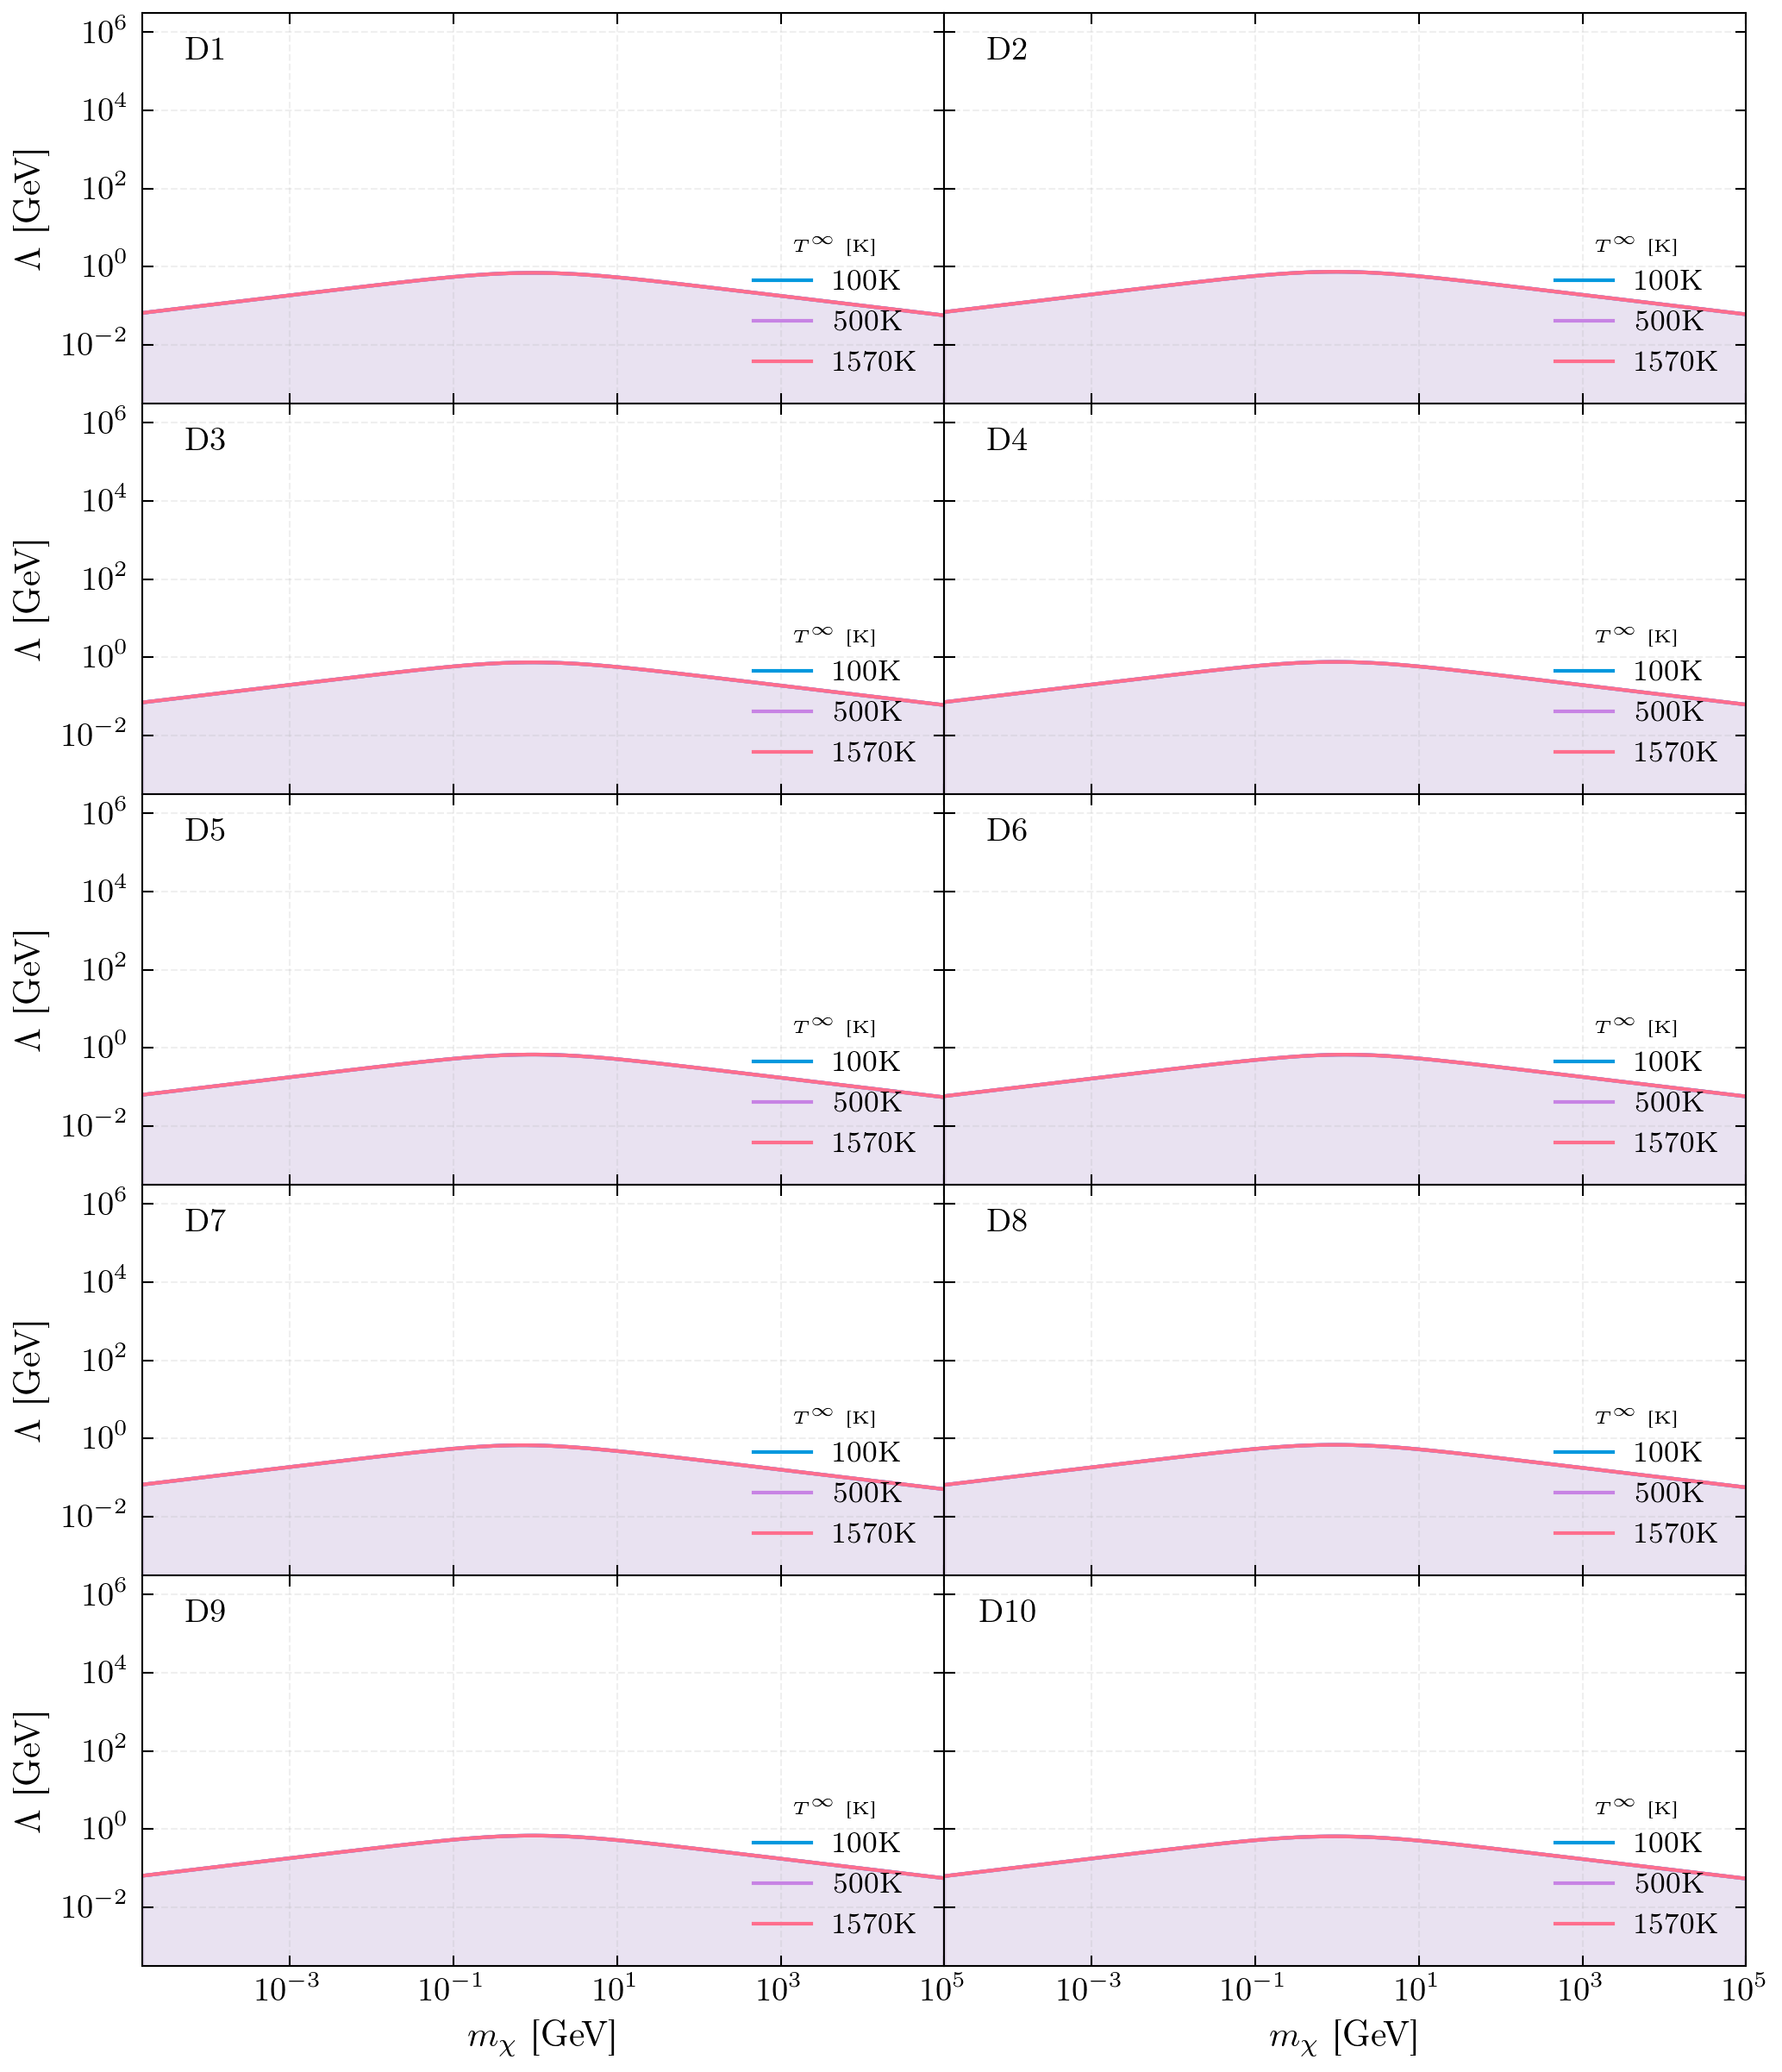

In [31]:
FS_heating_plots()

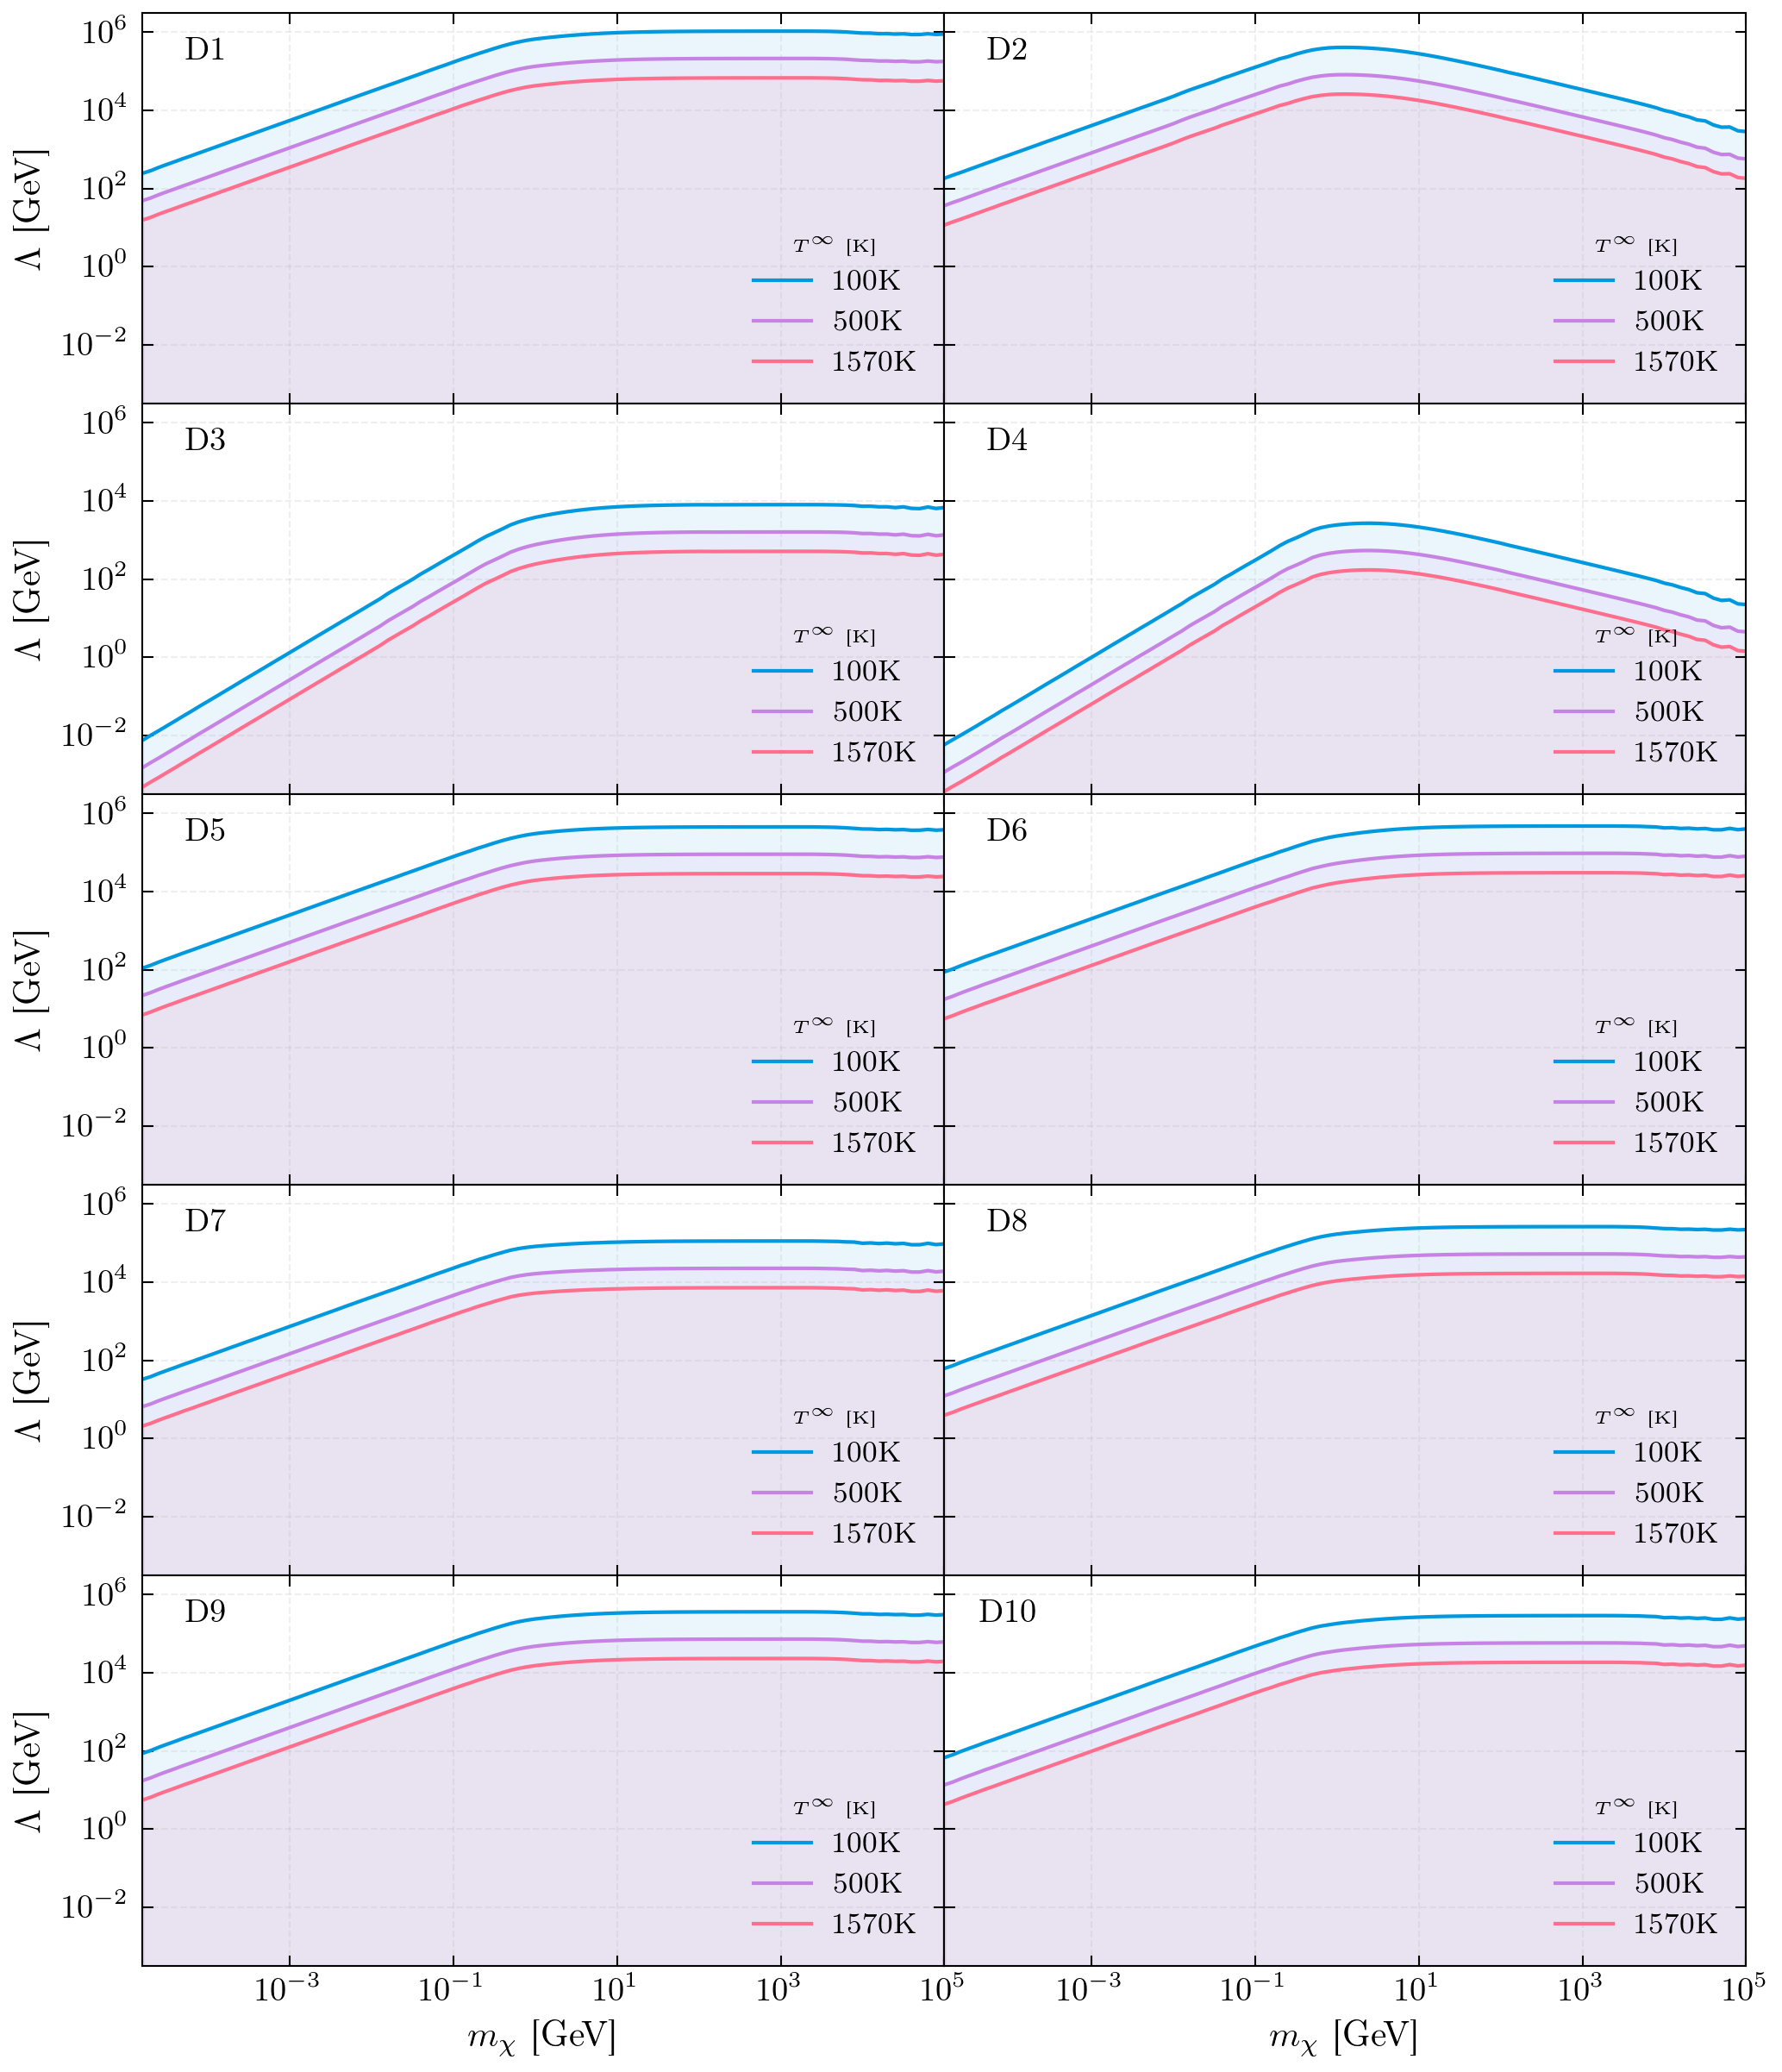

In [32]:
kinetic_heating_plots()

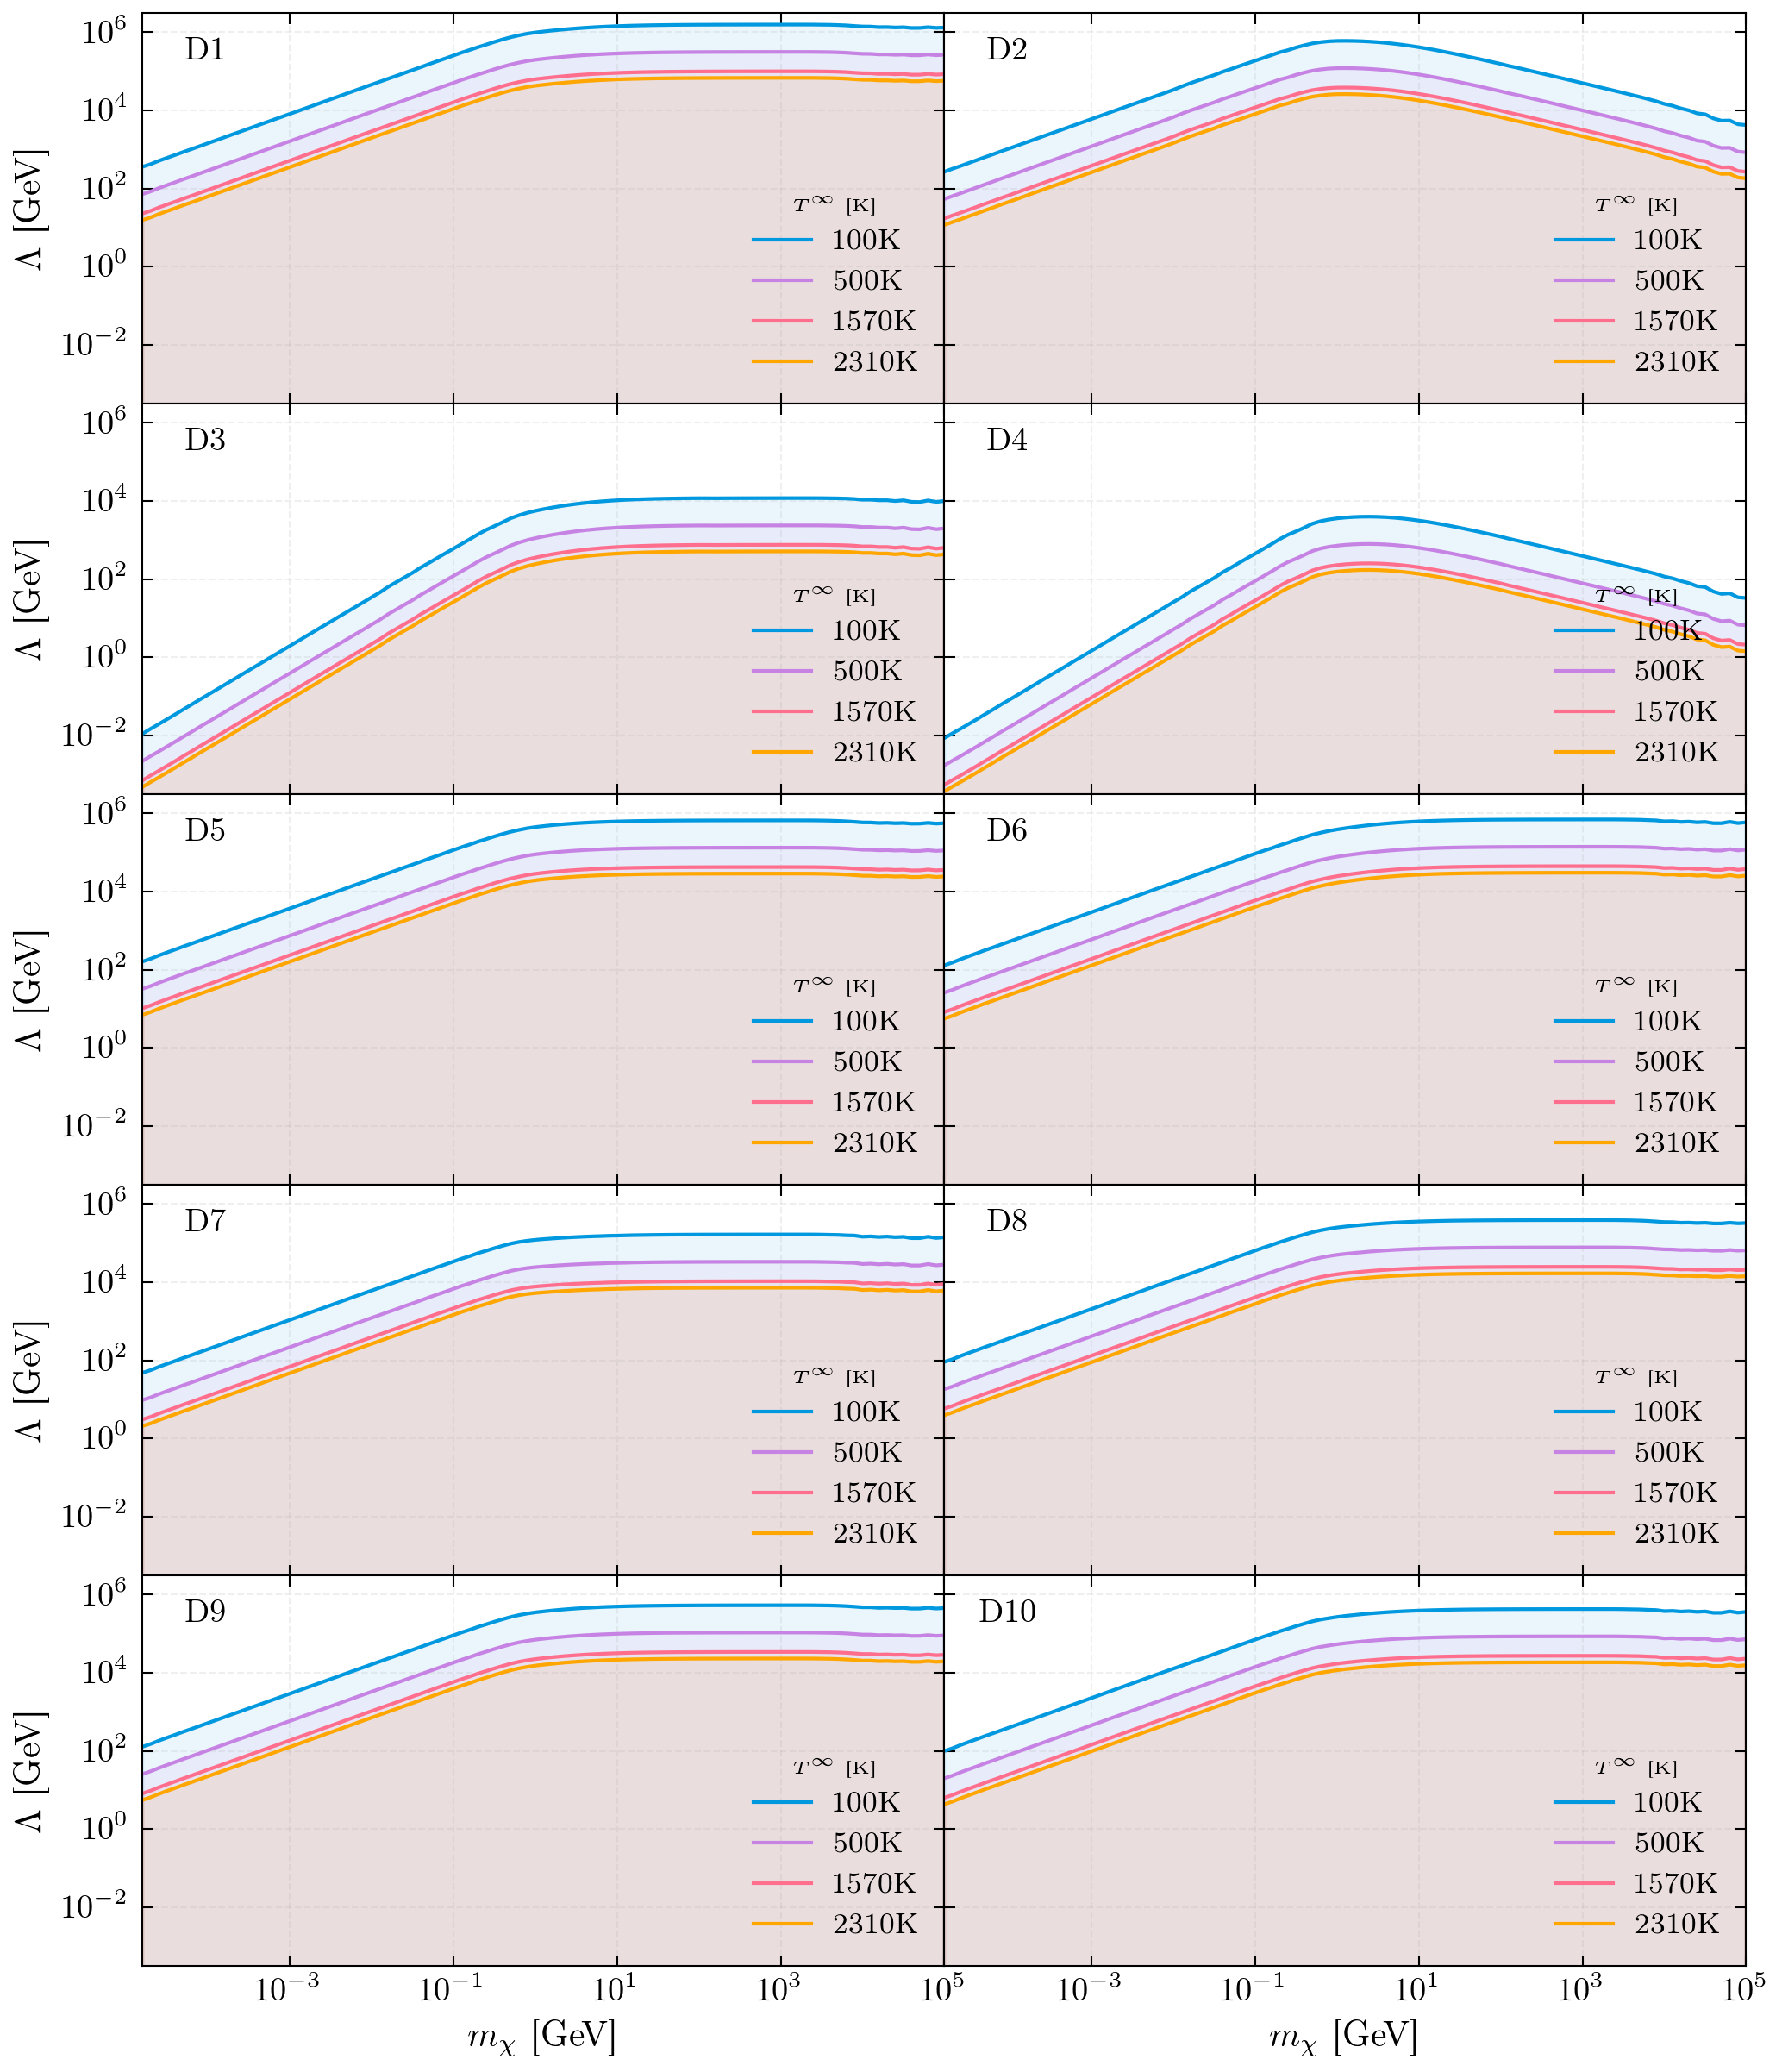

In [33]:
ann_heating_plots()

In [34]:
def combined_heating_plots():
    kheatfiles = glob.glob('*Kheating.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1], linestyle = '--')
            for l in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][l], coloursa[l-1], label = leg_labelsk[l-1], linestyle = ':')
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            if n == 1:
                col.legend(loc = (1, 0.2), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            i+=1
    plt.savefig('com_heating_plots.pdf')
    plt.show()

In [35]:
ann_heatingFD_plots()

NameError: name 'ann_heatingFD_plots' is not defined

In [ ]:
def ann_compare_heating_plots():
    cols = ['#0098de','#c783e4' ,'#ff6e8d', '#ffa600']
    
    aheatfilesFD = glob.glob('*AheatingFD.dat')

    aheat_dataFD = {}

    for file in aheatfilesFD:
        aheat_dataFD[file.replace('_AheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-', alpha = 0.8)
                col.loglog(aheat_dataFD['d'+str(i)][0], aheat_dataFD['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1], linestyle = ':')
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            if n == 1:
                col.legend(loc = (1, 0.2), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            i+=1
    plt.savefig('anFDcombined.pdf')
    plt.show()

In [ ]:
ann_compare_heating_plots()

In [ ]:
def ann2compare(i):
    cols = ['#0098de','#c783e4' ,'#ff6e8d', '#ffa600']
    fig, ax = plt.subplots(figsize = (5, 3), sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')

    for j in range(len(aheat_dataFD['d'+str(i)].columns))[1:]:
        ax.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1]+' no FD', linestyle = '-', alpha = 0.8)
        ax.loglog(aheat_dataFD['d'+str(i)][0], aheat_dataFD['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1] + ' FD', linestyle = ':')
        
    ax.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=ax.transAxes)
    ax.set_xlabel('$m_\chi$ [GeV]')
    ax.set_xlim(10**(-4.8), 1e5)
#     ax.set_ylim(10**-3.5, 10**6.5)
    ax.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
    ax.grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax.set_ylabel('$\Lambda$ [GeV]')
    
    plt.savefig('compareAnn.pdf')
    plt.show()

In [ ]:
ann2compare(1)